## Coach Lab Linear Regression

### Objectives
*Put together a linear regression model <br>
*Understand the steps in modeling<br>
*Evaluate linear regression model


![caption](images/Model_Process_Part1.png)
![caption](images/Model_Process_Part2.png)

In [35]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

#### For this lesson we will use the computer hardware dataset from https://www.mldata.io/dataset-details/computer_hardware/

In [2]:
comp = pd.read_csv('data/computer_hardware_dataset.csv')

### Project Question Formulation


What do we want to evaluate/explore/answer????

In [3]:
comp.head()

,vendor_name,model_name,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132


In [6]:
comp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   vendor_name  209 non-null    object
 1   model_name   209 non-null    object
 2   MYCT         209 non-null    int64 
 3   MMIN         209 non-null    int64 
 4   MMAX         209 non-null    int64 
 5   CACH         209 non-null    int64 
 6   CHMIN        209 non-null    int64 
 7   CHMAX        209 non-null    int64 
 8   PRP          209 non-null    int64 
 9   ERP          209 non-null    int64 
dtypes: int64(8), object(2)
memory usage: 16.5+ KB


In [7]:
comp.describe().T

,count,mean,std,min,25%,50%,75%,max
MYCT,209.0,203.822967,260.262926,17.0,50.0,110.0,225.0,1500.0
MMIN,209.0,2867.980861,3878.742758,64.0,768.0,2000.0,4000.0,32000.0
MMAX,209.0,11796.153110,11726.564377,64.0,4000.0,8000.0,16000.0,64000.0
CACH,209.0,25.205742,40.628722,0.0,0.0,8.0,32.0,256.0
CHMIN,209.0,4.698565,6.816274,0.0,1.0,2.0,6.0,52.0
CHMAX,209.0,18.267943,25.997318,0.0,5.0,8.0,24.0,176.0
PRP,209.0,105.622010,160.830733,6.0,27.0,50.0,113.0,1150.0
ERP,209.0,99.330144,154.757102,15.0,28.0,45.0,101.0,1238.0


### Step 1 Train/test Split
#### Target is PRP

In [8]:
# create y and X as the target and the features
y = comp['PRP']
X = comp.drop(columns=['PRP'])

In [9]:
#split data into test and train sets

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = .25)

In [10]:
#get shape of the training and test sets
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((156, 9), (156,), (53, 9), (53,))

In [18]:
X_train.isnull().sum()

vendor_name    0
model_name     0
MYCT           0
MMIN           0
MMAX           0
CACH           0
CHMIN          0
CHMAX          0
ERP            0
dtype: int64

In [23]:
X_train

,vendor_name,model_name,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,ERP
29,c.r.d,universe:68/37,320,256,5000,4,1,6,27
19,burroughs,b4955,110,5000,5000,142,8,64,124
135,magnuson,m80/43,50,2000,16000,24,6,16,88
139,nas,as/3000-n,115,2000,4000,2,1,5,29
66,hp,3000/30,90,256,1000,0,3,10,18
65,gould,concept:32/8780,75,2000,16000,128,1,38,157
5,amdahl,470v/b,26,8000,32000,64,8,32,290
146,nas,as/6630,60,4000,16000,64,5,8,117
56,dg,eclipse:mv/8000-ii,220,1000,8000,16,1,2,42
97,ibm,3083:b,26,8000,32000,0,8,24,220


In [24]:
len(X_train.vendor_name.value_counts())

29

In [25]:
len(X_train.model_name.value_counts())

156

In [33]:
def drop_columns(df, col_name):
        df = df.drop(columns = [col_name])
        return df

In [34]:
drop_columns(X_train, 'model_name')

,vendor_name,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,ERP
29,c.r.d,320,256,5000,4,1,6,27
19,burroughs,110,5000,5000,142,8,64,124
135,magnuson,50,2000,16000,24,6,16,88
139,nas,115,2000,4000,2,1,5,29
66,hp,90,256,1000,0,3,10,18
65,gould,75,2000,16000,128,1,38,157
5,amdahl,26,8000,32000,64,8,32,290
146,nas,60,4000,16000,64,5,8,117
56,dg,220,1000,8000,16,1,2,42
97,ibm,26,8000,32000,0,8,24,220


### Step 2- Exploratory Data Analysis 

We will use only the training data for this part

#### As a first step in data cleaning lets look for missing values

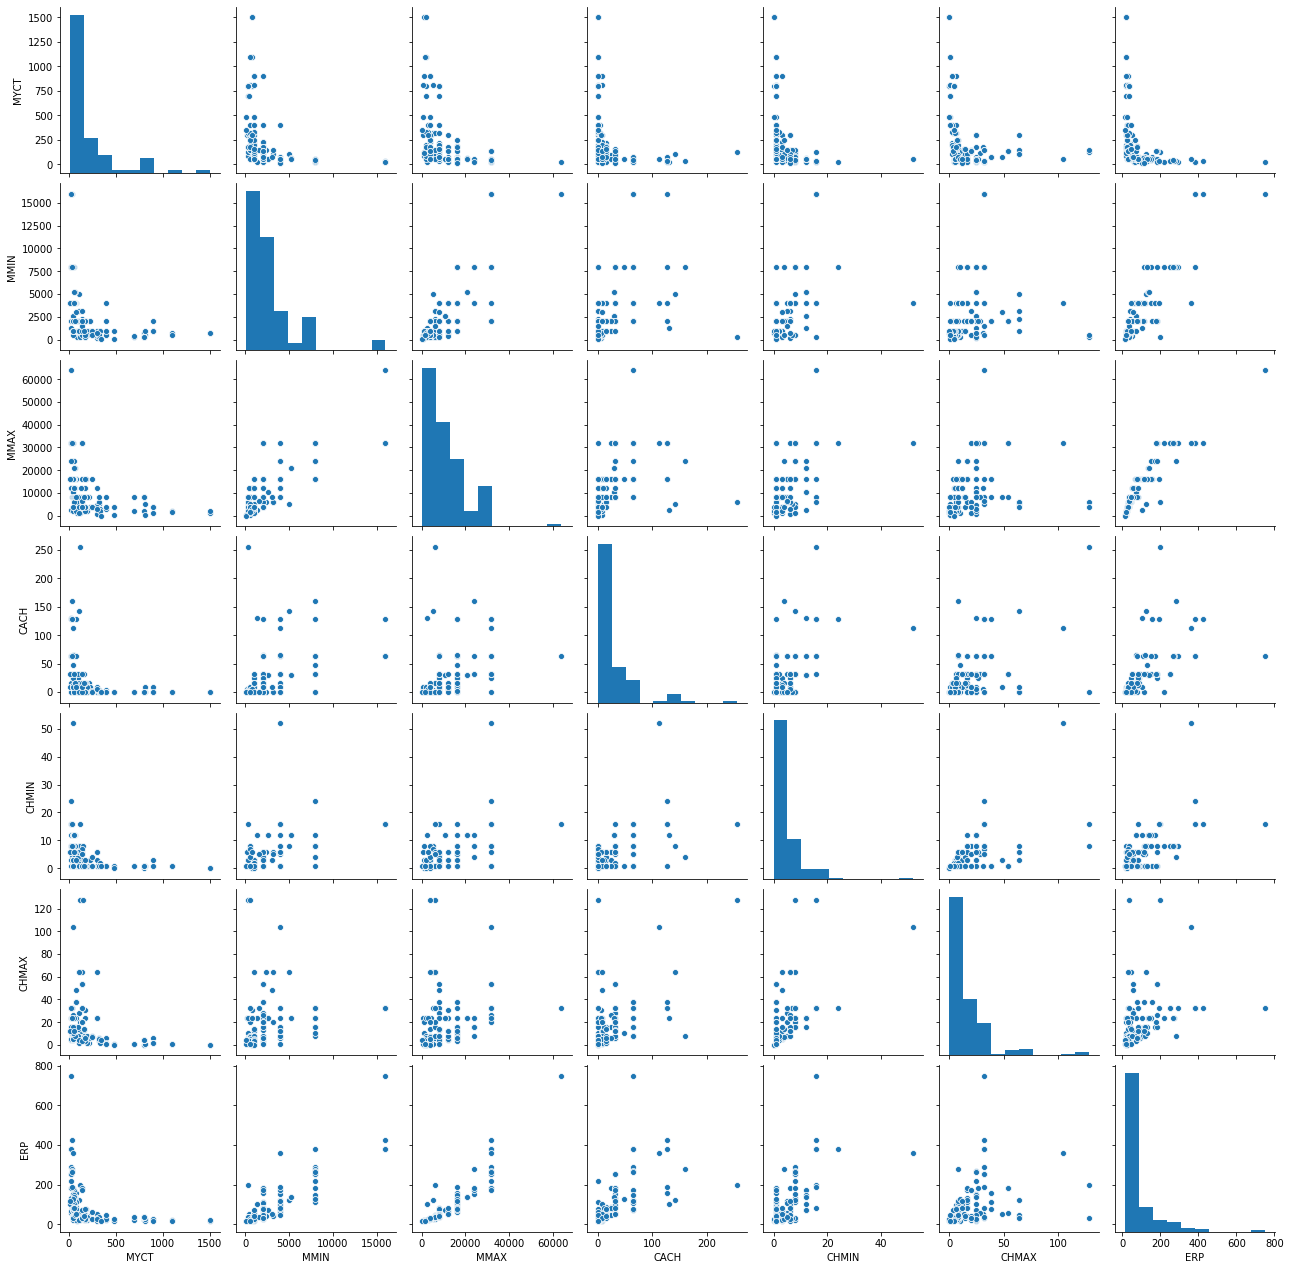

In [36]:
sns.pairplot(X_train)

#### Next let's look at the distribution of our variables

In [ ]:
#create scatterplot matrix

#### Next let's look at the distribution of our target

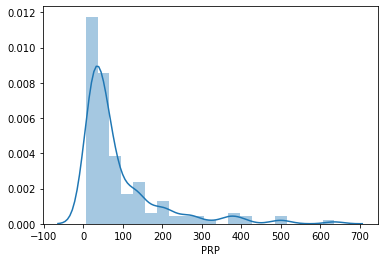

In [37]:
#histogram of y_train

sns.distplot(y_train)

#### Do we have any categorical variables we need to encode?

In [51]:
X_train_log = pd.concat([X_train.loc[:,'vendor_name'], 
                         X_train.loc[:,'CACH':'CHMAX'],
                         X_train.loc[:, 'MYCT':'MMAX'].applymap(np.log).add_suffix('_log')], axis=1)

#### Next let's scale our data

Why do we do this?  What does it mean about the comparability of our variables?  What about interpretation of coefficients?

In [52]:
X_train_log.head()

,vendor_name,CACH,CHMIN,CHMAX,MYCT_log,MMIN_log,MMAX_log
29,c.r.d,4,1,6,5.768321,5.545177,8.517193
19,burroughs,142,8,64,4.700480,8.517193,8.517193
135,magnuson,24,6,16,3.912023,7.600902,9.680344
139,nas,2,1,5,4.744932,7.600902,8.294050
66,hp,0,3,10,4.499810,5.545177,6.907755


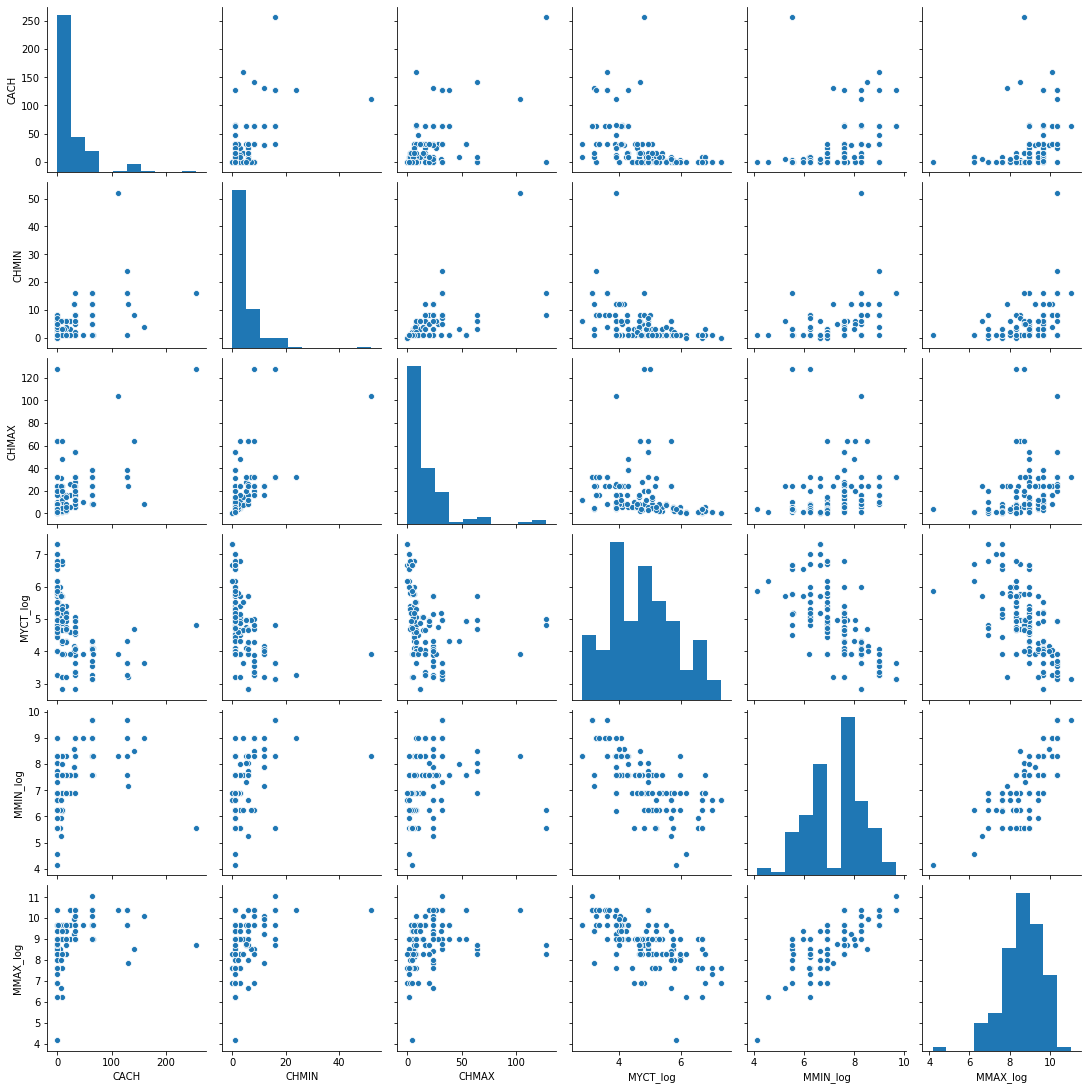

In [53]:
sns.pairplot(X_train_log)

### Step 4 - Messy Model

#### First let's use statsmodels

In [55]:
#Linear regression using statsmodels
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()


In [56]:
vendor_matrix = enc.fit_transform(X_train_log.vendor_name.values.reshape(-1,1)).toarray()

In [57]:
X_train_log = X_train_log.drop('vendor_name', axis=1)

In [59]:
X_train_log.head()

,CACH,CHMIN,CHMAX,MYCT_log,MMIN_log,MMAX_log
29,4,1,6,5.768321,5.545177,8.517193
19,142,8,64,4.700480,8.517193,8.517193
135,24,6,16,3.912023,7.600902,9.680344
139,2,1,5,4.744932,7.600902,8.294050
66,0,3,10,4.499810,5.545177,6.907755


In [60]:
X_train_log.reset_index(drop=True, inplace=True)

In [61]:
X_train_log.head()

,CACH,CHMIN,CHMAX,MYCT_log,MMIN_log,MMAX_log
0,4,1,6,5.768321,5.545177,8.517193
1,142,8,64,4.700480,8.517193,8.517193
2,24,6,16,3.912023,7.600902,9.680344
3,2,1,5,4.744932,7.600902,8.294050
4,0,3,10,4.499810,5.545177,6.907755


#### Now let's use sklearn

In [ ]:
#initialize a linear regression model in sklearn

In [ ]:
#fit linear model to training data

### Step 5 - Model Evaluation

In [ ]:
#get summary statistics from statsmodels


In [ ]:
#get r squared value from sklearn


In [ ]:
#create formula for adjusted r squared
def adjusted_r_suared(r_squared, num_samples, num_regressors):
    return 1 - ((1-r_squared)*(num_samples - 1) / (num_samples - num_regressors - 1))

In [ ]:
#calculate adjusted r squared
adjusted_r_suared()

#### What does the r-squared value mean? What do the r-squared values tell us about the fit of our model?  What about adjusted r-squared?

#### Now let's look at predictions of relative performance to compare to actual relative performance

In [ ]:
linreg_results_df = pd.DataFrame(linreg.predict(X_train), y_train).reset_index()

In [ ]:
linreg_results_df.columns = ['Actual_Price', 'Predicted_Price']

In [ ]:
linreg_results_df.head()

## Let's use regularization to see if that helps our model fit

In [ ]:
#importing Lasso and Ridge models from sklearn
from sklearn.linear_model import Lasso, Ridge

### Lasso Regularizer

In [ ]:
#conduct lasso regression on training data

In [ ]:
#Evaluation of lasso on training data

In [ ]:
#examine coefficients from lasso

### Ridge Regularizer

In [ ]:
#conduct ridge regression on training data

In [ ]:
#Evaluation of ridge on training data

In [ ]:
#examine coefficients from ridge

### Step 6 - Best Model Evaluation

In [ ]:
#apply data cleaning process to test set

In [ ]:
#run best model on test set

### Step 7 - Model Interpretation

What take-ways do we have?  Conclusions about our initial question?  Who would care?  Why do they care?